In [1]:
import jupypft.attachmentRateCFT as cft
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''CASE CONSTANTS'''
#Porosity
theta = 0.33 # adim
collector_size = 3.84E-4 # Lab silica sand
particle_size = 5e-6 #m 
hamaker_constant = 5.0E-21 # J = N·m
temperature_in_kelvin = 10 + 273 #K
viscosity = 0.0008891 # N·s/m²
water_density = 999.79 # kg/m³
particle_density = 1050.0 # kg/m³ 
alpha = 0.35 # adim << clay/sand interaction
ref_K0 = 1.2e-3 #m/s

dune_wavelenght = 0.15 #m
dune_height = 0.015
bedform_wavenumber = 2 * np.pi/dune_wavelenght
mean_stream_velocity = 0.15 #m/s
mean_stream_depth = 0.0975 #m
bed_depth = 0.20 #m

porosity = np.linspace(0.05, theta)

In [3]:
def kozeny_carman(porosity, ref_hydr_conductivity, ref_porosity):
    return ref_hydr_conductivity * porosity**3 * (1 - ref_porosity)**2 / (ref_porosity**3 * (1 - porosity)**2)

def sinusoidal_head_half_amplitude(U, H, d):
    exponent = 3/8 if H/d < 0.34 else 3/2
    g = 9.81
    return 0.28 * U**2/(2*g) * np.power((H/d)/0.34, exponent)

def max_darcy_velocity(bedform_wavenumber, hydr_conductivity, h_m):
    return bedform_wavenumber * hydr_conductivity * h_m

def characteristic_hyporheic_flux(u_m, bedform_wavenumber, db):
    """
    Eq. (33) from Packman et al. (2000) - A physicochemicla model for colloid exchange 
    between a stream and a sand streambed with bed forms.
    """
    return u_m * (np.tanh(bedform_wavenumber * db) / np.pi)

In [4]:
h_m = sinusoidal_head_half_amplitude(
    U = mean_stream_velocity,
    H = dune_height,
    d = mean_stream_depth
)

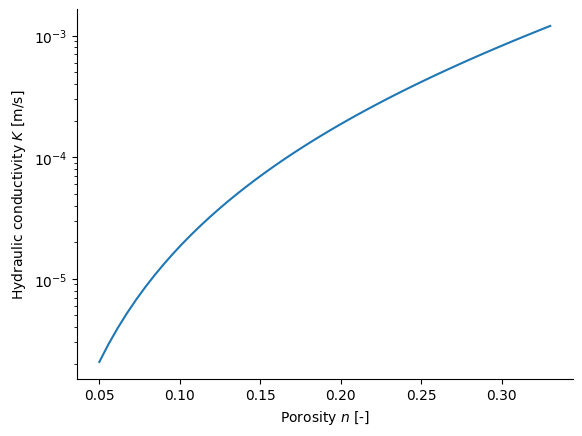

In [5]:
hydraulic_cond = kozeny_carman(porosity=porosity, ref_hydr_conductivity=ref_K0, ref_porosity=theta)

fig,ax = plt.subplots()
ax.plot(porosity, hydraulic_cond)
ax.set_xlabel("Porosity $n$ [-]")
ax.set_ylabel("Hydraulic conductivity $K$ [m/s]")
ax.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

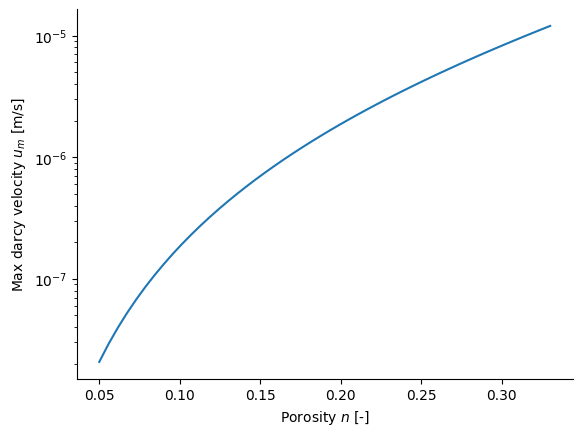

In [6]:
u_m = max_darcy_velocity(
    bedform_wavenumber=bedform_wavenumber,
    hydr_conductivity=hydraulic_cond,
    h_m=h_m
)

fig,ax = plt.subplots()
ax.plot(porosity, u_m)
ax.set_xlabel("Porosity $n$ [-]")
ax.set_ylabel("Max darcy velocity $u_m$ [m/s]")
ax.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

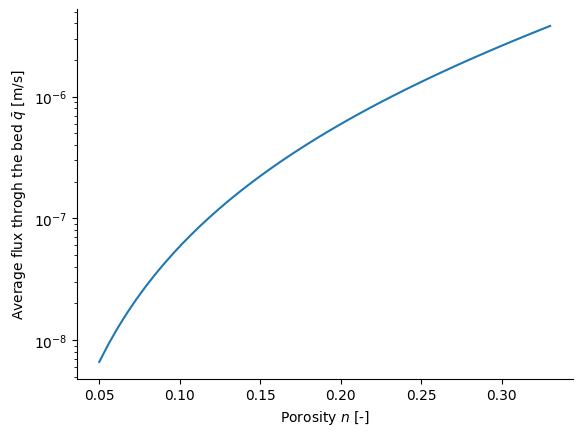

In [7]:
qbar = characteristic_hyporheic_flux(
    u_m = u_m,
    bedform_wavenumber=bedform_wavenumber,
    db = bed_depth
)

fig,ax = plt.subplots()
ax.plot(porosity, qbar)
ax.set_xlabel("Porosity $n$ [-]")
ax.set_ylabel(r"Average flux throgh the bed $\bar{q}$ [m/s]")
ax.set_yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [8]:
katt = cft.attachmentRate(
    dp = particle_size,
    dc = collector_size,
    q = qbar,
    theta = porosity,
    visco = viscosity,
    rho_f = water_density,
    rho_p = particle_density,
    A = hamaker_constant,
    T = temperature_in_kelvin,
    alpha = alpha,
    debug=False)

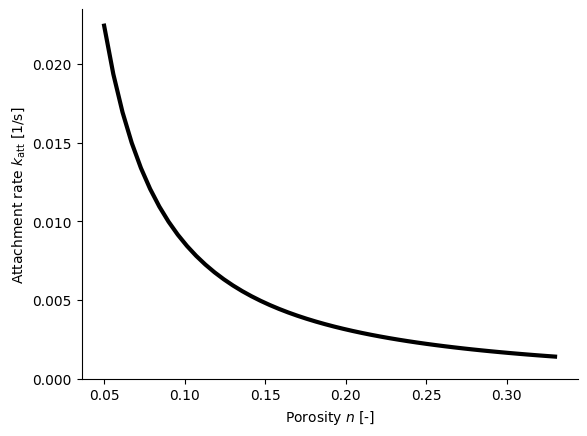

In [11]:
fig,ax = plt.subplots()
ax.plot(porosity, katt, lw=3, c='k')
ax.set_xlabel("Porosity $n$ [-]")
ax.set_ylabel(r"Attachment rate $k_{\rm att}$ [1/s]")
ax.set_ylim(bottom=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig("SI.AttachmentRate_Porosity.pdf",bbox_inches='tight', pad_inches=0.05)
plt.show()